# ***Read DF***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
import scipy.stats as st
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.lines import Line2D
from joblib import dump
from joblib import load
#%matplotlib ipympl
#from google.colab import output
#output.enable_custom_widget_manager()

pd.set_option('display.max_columns', None)

# from statsmodels.graphics.tsaplots import plot_acf
#import statsmodels.graphics.correlation as pltcorr
#from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import resample



#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
import scipy.stats as st
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.lines import Line2D
from joblib import dump
from joblib import load
#%matplotlib ipympl
#from google.colab import output
#output.enable_custom_widget_manager()

pd.set_option('display.max_columns', None)

# from statsmodels.graphics.tsaplots import plot_acf
#import statsmodels.graphics.correlation as pltcorr
#from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')



#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
def file_prep(df):
    # convert from csv to pandas dataframe
    df = pd.read_csv(df, sep = ",")  # Using header=None since it seems there's no header in your data.
    return df

diabetesDf = file_prep('/content/drive/MyDrive/Diabetes/diabetes_prediction_dataset.csv')

# generate a numeric value for each HbA1c_level value starting from 0
#diabetesDf['HbA1c_cat'] = diabetesDf['HbA1c_level'].rank(method='dense').astype(int) - 1

# generate a numeric value for each blood_glucose_level value starting from 0d
# diabetesDf['blood_glucose_level_cat'] = diabetesDf['blood_glucose_level'].rank(method='dense').astype(int) - 1


diabetesDf['gender_cat'] = diabetesDf['gender'].str.strip().str.lower().replace({'male': 1, 'female': 0, 'other': 2})


# diabetesDf['diabetes anomaly'] = (((diabetesDf["HbA1c_level"] >= 6.5) |
#                                    (diabetesDf['blood_glucose_level'] >= 200)) &
#                                    (diabetesDf["diabetes"] == 0)).astype(int)

# # Define your custom mapping
smoking_mapping_1 = {
    'never': 0,
    'No Info': 1,
    'current': 2,
    'ever': 3,
    'former': 3,
    'not current': 3
}

# # # Apply the mapping to the recategorized 'smoking_history_cat_2' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history_cat_2'].replace(smoking_mapping_1)



# Apply the new mapping to the 'smoking_history_cat' column
diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)

# Print unique values in the 'smoking_history' column
#print(diabetesDf['smoking_history'].unique())

# Define a function to map the existing categories to new ones
################################################################################################
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
diabetesDf['smoking_history'] = diabetesDf['smoking_history'].apply(recategorize_smoking)

# Check unique values after applying recategorize_smoking
print("Unique values after recategorize_smoking:", diabetesDf['smoking_history'].unique())

################################################################################################

# def recategorize_smoking_1(smoking_status_1):
#     if smoking_status_1 in ['never', 'No Info']:
#         return 'non-smoker'
#     elif smoking_status_1 == 'current':
#         return 'current'
#     elif smoking_status_1 in ['ever', 'former', 'not current']:
#         return 'past_smoker'

# # # Apply the function to the original 'smoking_history' column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].apply(recategorize_smoking_1)
######################################################################################################



# Apply the new mapping to the 'smoking_history_cat' column
#diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)
########################################################################################################

# # Define your custom mapping
# Define a new mapping (modify as needed)
new_smoking_mapping = {
    'non-smoker': 0,
    'current': 1,
    'past_smoker': 2,
    # Add any additional categories here
}



# Apply the new mapping to the 'smoking_history_cat' column
diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].replace(new_smoking_mapping)

# Print unique values in the 'smoking_history' column
print(diabetesDf['smoking_history'].unique())

# Apply the new mapping to the 'smoking_history_cat' column
diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].replace(new_smoking_mapping)

################################################################################################
# def recategorize_smoking_2(smoking_status):
#     if smoking_status in ['never', 'No Info']:
#         return 'non-smoker'
#     elif smoking_status == 'current':
#         return 'current'
#     elif smoking_status in ['ever', 'former', 'not current']:
#         return 'past_smoker'

# # # # Apply the function to the 'smoking_history' column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].apply(recategorize_smoking_2)

# # # # Define your custom mapping
# smoking_mapping = {
#     'non-smoker': 0,
#     'current': 1,
#     'past_smoker': 2}

# # Apply the mapping to your column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history_cat'].replace(smoking_mapping)

################################################################################################


# # Apply the mapping to your column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].replace(smoking_mapping)
# def recategorize_smoking(smoking_status):
#     if smoking_status == 'never':
#         return 0
#     elif smoking_status == 'No Info':
#         return 1
#     elif smoking_status in ['ever', 'former', 'not current']:
#         return 2
#     elif smoking_status == 'current':
#         return 3

# # Apply the function to the 'smoking_history' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].apply(recategorize_smoking)


# # # Define your custom mapping
# smoking_mapping_1 = {
#     'non-smoker': 0,
#     'no_info': 1,
#     'current': 2,
#     'past_smoker': 3
# }

# # # # Apply the mapping to the recategorized 'smoking_history_cat_2' column
# # diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history_cat_2'].replace(smoking_mapping_1)



# # Apply the new mapping to the 'smoking_history_cat' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)

# # Print unique values in the 'smoking_history' column
# print(diabetesDf['smoking_history'].unique())

# # Apply the new mapping to the 'smoking_history_cat' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)

################################################################################
# blood_glucose_level_groups based on
def blood_glucose_level_groups(blood_glucose_level):
    if blood_glucose_level < 100:
        return 1  # normal
    elif 100 <= blood_glucose_level <= 125:
        return 2  # pre diabetes
    else:
        return 3  # diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['blood_glucose_level_cat'] = diabetesDf['blood_glucose_level'].apply(blood_glucose_level_groups)
################################################################################

# blood_glucose_level_groups based on
def blood_glucose_level_groups(blood_glucose_level):
    if blood_glucose_level <= 100:
        return 1  # normal
    elif 126 <= blood_glucose_level <= 200:
        return 2  # pre diabetes
    else:
        return 3  # diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['blood_glucose_level_cat_1'] = diabetesDf['blood_glucose_level'].apply(blood_glucose_level_groups)
################################################################################

def age_groups(age):
    if age < 18:
        return 1  # lessed risky diabetes group
    elif 18 <= age <= 44:
        return 2  # higher risky group
    elif 45 <= age <= 64: # higher risk group
        return 3
    else:
        return 4 # highest risk group

# Apply the function to the 'HbA1c_level' column
diabetesDf['age_cat'] = diabetesDf['age'].apply(age_groups)


################################################################################


def categorize_HbA1c_level(HbA1c_level):
    if HbA1c_level < 5.7:
        return 1  # normal
    elif 5.7 <= HbA1c_level <= 6.4:
        return 2  # indicates prediabetes
    elif HbA1c_level >= 6.5:
        return 3  # indicates diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['HbA1c_level_cat'] = diabetesDf['HbA1c_level'].apply(categorize_HbA1c_level)

################################################################################

def categorize_HbA1c_level(HbA1c_level):
    if HbA1c_level < 5.7:
        return 1  # normal
    elif 5.7 <= HbA1c_level <= 6.6:
        return 2  # indicates prediabetes
    elif HbA1c_level >= 6.8:
        return 3  # indicates diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['HbA1c_level_cat_2'] = diabetesDf['HbA1c_level'].apply(categorize_HbA1c_level)

################################################################################

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 1     # Underweight
    elif 18.5 <= bmi < 25:
        return 2    # Healthy Weight
    elif 25 <= bmi < 30:
        return 3   # Overweight
    else:
        return 4   # Obesity

# Apply the function to the 'bmi' column
diabetesDf['bmi_cat'] = diabetesDf['bmi'].apply(categorize_bmi)
print(diabetesDf)

################################################################################

print(diabetesDf['smoking_history_cat'].value_counts())

print(diabetesDf)

Unique values after recategorize_smoking: ['non-smoker' 'current' 'past_smoker']
['non-smoker' 'current' 'past_smoker']
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1      non-smoker  25.19   
1      Female  54.0             0              0      non-smoker  27.32   
2        Male  28.0             0              0      non-smoker  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0      non-smoker  27.32   
99996  Female   2.0             0              0      non-smoker  17.37   
99997    Male  66.0             0              0     past_smoker  27.83   
99998  Female  24.0             0              0      non-smoker  35.42   
99999  Female  57.0             0              0       

In [ ]:
print(diabetesDf['smoking_history_cat_2'].unique())
print(diabetesDf['smoking_history_cat'].unique())
print(diabetesDf['smoking_history'].unique())


[0 1 2 3]
[0 1 2]
['non-smoker' 'current' 'past_smoker']


In [ ]:
print(diabetesDf[diabetesDf['blood_glucose_level_cat_1'] == 3])

       gender   age  hypertension  heart_disease smoking_history    bmi  \
38       Male  50.0             1              0         current  27.32   
87     Female  36.0             0              0         current  32.27   
94     Female  60.0             0              0      non-smoker  27.32   
104    Female  80.0             1              0      non-smoker  27.32   
125    Female  77.0             0              0      non-smoker  31.70   
...       ...   ...           ...            ...             ...    ...   
99867    Male  64.0             1              0     past_smoker  33.12   
99897    Male  67.0             0              0         current  27.32   
99938    Male  55.0             0              1     past_smoker  30.42   
99957  Female  61.0             0              0      non-smoker  34.45   
99979  Female  61.0             0              0         current  30.11   

       HbA1c_level  blood_glucose_level  diabetes  gender_cat  \
38             5.7                

In [ ]:
print('Diabetes df:', diabetesDf.shape)
print()
print('Missing values of Diabetes df', diabetesDf.isnull().sum().sum())

Diabetes df: (100000, 18)

Missing values of Diabetes df 0


In [ ]:
# Handle duplicates
duplicate_rows_data = diabetesDf[diabetesDf.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)


number of duplicate rows:  (4032, 18)


In [ ]:
diabetesDf = diabetesDf.drop_duplicates()

In [ ]:
# Loop through each column and count the number of distinct values
for column in diabetesDf.columns:
    num_distinct_values = len(diabetesDf[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 3 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values
gender_cat: 3 distinct values
smoking_history_cat_2: 4 distinct values
smoking_history_cat: 3 distinct values
blood_glucose_level_cat: 3 distinct values
blood_glucose_level_cat_1: 3 distinct values
age_cat: 4 distinct values
HbA1c_level_cat: 3 distinct values
HbA1c_level_cat_2: 3 distinct values
bmi_cat: 4 distinct values


In [ ]:
# Checking null values
print(diabetesDf.isnull().sum())

gender                       0
age                          0
hypertension                 0
heart_disease                0
smoking_history              0
bmi                          0
HbA1c_level                  0
blood_glucose_level          0
diabetes                     0
gender_cat                   0
smoking_history_cat_2        0
smoking_history_cat          0
blood_glucose_level_cat      0
blood_glucose_level_cat_1    0
age_cat                      0
HbA1c_level_cat              0
HbA1c_level_cat_2            0
bmi_cat                      0
dtype: int64


In [ ]:
# Remove Unneccessary value [0.00195%]
diabetesDf = diabetesDf[diabetesDf['gender'] != 'Other']

In [ ]:
diabetesDf.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_cat,smoking_history_cat_2,smoking_history_cat,blood_glucose_level_cat,blood_glucose_level_cat_1,age_cat,HbA1c_level_cat,HbA1c_level_cat_2,bmi_cat
count,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00
mean,41.77,0.08,0.04,27.32,5.53,138.22,0.09,0.42,1.14,0.50,2.51,1.75,2.49,1.83,1.66,2.84
std,22.46,0.27,0.20,6.77,1.07,40.92,0.28,0.49,1.12,0.81,0.82,0.50,0.98,0.75,0.55,0.90
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,24.00,0.00,0.00,23.39,4.80,100.00,0.00,0.00,0.00,0.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00,0.00,1.00,0.00,3.00,2.00,2.00,2.00,2.00,3.00
75%,59.00,0.00,0.00,29.87,6.20,159.00,0.00,1.00,2.00,1.00,3.00,2.00,3.00,2.00,2.00,3.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00,1.00,3.00,2.00,3.00,3.00,4.00,3.00,3.00,4.00


In [ ]:
# smoking_history_age = diabetesDf[['smoking_history', 'age']]


# def recategorize_smoking(smoking_status, age):
#     if (smoking_status in ['past_smoker', 'current']) and (age <= 16):
#         return 'non-smoker'
#     else:
#         return smoking_status

# # Applying the function to the DataFrame
# # Assuming 'smoking_history' and 'age' are column names in the diabetesDf DataFrame
# diabetesDf['smoking_history'] = diabetesDf.apply(lambda row: recategorize_smoking(row['smoking_history'], row['age']), axis=1)

# def define_age(age):
#     if age <= 1.5:  # Categorize all ages <= 1.5 years as 1
#         return 1
#     elif age <= 2:  # Categorize ages > 1.5 and <= 2 years as 2
#         return 2
#     else:
#         return age  # Return the actual age for all other cases

# # # Apply the function to the 'age' column
# # # Ensure you are updating the correct column in the DataFrame
# diabetesDf['age'] = diabetesDf['age'].apply(define_age)


# smoking_history_age = diabetesDf[['smoking_history', 'age']]


In [ ]:
import pandas as pd

# Assuming diabetesDf is a pandas DataFrame with 'smoking_history' and 'age' columns
# Sample DataFrame
# diabetesDf = pd.DataFrame({
#     'smoking_history': ['past_smoker', 'current', 'non-smoker', 'past_smoker'],
#     'age': [15, 30, 20, 12]
# })
# 'never' 'No Info' 'current' 'former' 'ever' 'not current' 'non-smoker'
def recategorize_smoking(smoking_status, age):
    if (smoking_status in ['past_smoker', 'current', 'never', 'No Info', 'current', 'former', 'ever', 'not current']) and (age < 16):
        return 'non-smoker'
    else:
        return smoking_status

# Applying the function to the DataFrame
diabetesDf['smoking_history'] = diabetesDf.apply(lambda row: recategorize_smoking(row['smoking_history'], row['age']), axis=1)

# def define_age(age):
#     if age <= 1.5:  # Categorize all ages <= 1.5 years as 1
#         return 1
#     elif age <= 2:  # Categorize ages > 1.5 and <= 2 years as 2
#         return 2
#     else:
#         return age  # Return the actual age for all other cases

# # # Apply the function to the 'age' column
# # # Ensure you are updating the correct column in the DataFrame
# diabetesDf['age'] = diabetesDf['age'].apply(define_age)
diabetesDf = diabetesDf[diabetesDf['age'] >= 1]

diabetesDf = diabetesDf[(diabetesDf['age'] <= 1) | (diabetesDf['age'] >= 2)]


In [ ]:
diabetesDf['age'] = diabetesDf['age'].astype(int)


In [ ]:
age_smoking_crosstab = pd.crosstab(diabetesDf['smoking_history'], diabetesDf['age'])
print(age_smoking_crosstab) # ever, former, non-smoker, not current, current

age              1     2    3    4    5    6    7    8    9    10   11   12  \
smoking_history                                                               
current           0     0    0    0    0    0    0    0    0    0    0    0   
non-smoker       83  1159  995  923  958  900  879  838  756  818  804  859   
past_smoker       0     0    0    0    0    0    0    0    0    0    0    0   

age               13   14   15   16   17   18   19   20   21   22   23   24  \
smoking_history                                                               
current            0    0    0   23   36   78  101  122  146  156  182  172   
non-smoker       909  883  943  901  869  958  970  908  881  869  827  844   
past_smoker        0    0    0   61   74   95  139  148  159  155  182  163   

age               25   26   27   28   29   30   31   32   33   34   35   36  \
smoking_history                                                               
current          174  171  199  194  208  182  177

In [ ]:
print(diabetesDf['smoking_history_cat_2'].unique())
print(diabetesDf['smoking_history_cat'].unique())
print(diabetesDf['smoking_history'].unique())

print(diabetesDf['blood_glucose_level_cat'].unique())
print(diabetesDf['blood_glucose_level_cat_1'].unique())

print(diabetesDf['HbA1c_level_cat_2'].unique())
print(diabetesDf['HbA1c_level_cat'].unique())

[0 1 2 3]
[0 1 2]
['non-smoker' 'current' 'past_smoker']
[3 1 2]
[2 1 3]
[2 1 3]
[3 2 1]


In [ ]:
print(diabetesDf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93937 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     93937 non-null  object 
 1   age                        93937 non-null  int64  
 2   hypertension               93937 non-null  int64  
 3   heart_disease              93937 non-null  int64  
 4   smoking_history            93937 non-null  object 
 5   bmi                        93937 non-null  float64
 6   HbA1c_level                93937 non-null  float64
 7   blood_glucose_level        93937 non-null  int64  
 8   diabetes                   93937 non-null  int64  
 9   gender_cat                 93937 non-null  int64  
 10  smoking_history_cat_2      93937 non-null  int64  
 11  smoking_history_cat        93937 non-null  int64  
 12  blood_glucose_level_cat    93937 non-null  int64  
 13  blood_glucose_level_cat_1  93937 non-null  int

In [ ]:
# print(diabetesDf.describe())

descriptive_diabetes = diabetesDf[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
                                    'blood_glucose_level', 'diabetes', 'gender_cat', 'smoking_history_cat_2', 'blood_glucose_level_cat',
                                    'HbA1c_level_cat_2', 'blood_glucose_level_cat_1', 'HbA1c_level_cat',]]


print(descriptive_diabetes.describe())

                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  93937.000000  93937.000000   93937.000000  93937.000000  93937.000000   
mean      42.645816      0.079394       0.041741     27.523283      5.536290   
std       21.886383      0.270354       0.199997      6.677728      1.075061   
min        1.000000      0.000000       0.000000     10.010000      3.500000   
25%       25.000000      0.000000       0.000000     23.700000      4.800000   
50%       44.000000      0.000000       0.000000     27.320000      5.800000   
75%       60.000000      0.000000       0.000000     30.000000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes    gender_cat  smoking_history_cat_2  \
count         93937.000000  93937.000000  93937.000000           93937.000000   
mean            138.330796      0.090284      0.413894               1.147450   
std              41.051207      0.28

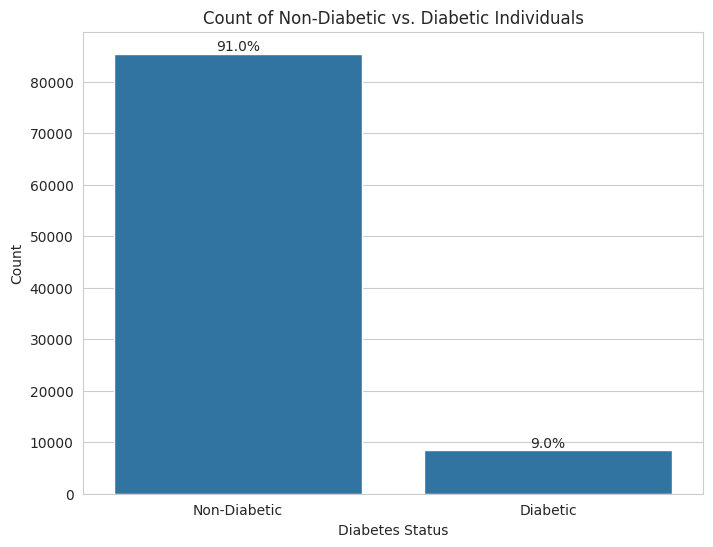

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming diabetesDf is your DataFrame and 'diabetes' is the column
plt.figure(figsize=(8, 6))
#sns.set_style("whitegrid")

# Create the count plot
ax = sns.countplot(x='diabetes', data=diabetesDf)
plt.title('Count of Non-Diabetic vs. Diabetic Individuals')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])

# Calculate the total number of individuals
total = float(len(diabetesDf))

# Loop through the patches (bars) in the countplot
for p in ax.patches:
    # Calculate the percentage and format it
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # Get the x and y coordinates to position the text
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the annotation
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


# XGB Model

In [ ]:
import wandb

# Replace 'YOUR_API_KEY' with your actual API key
wandb.login(key='1a537b93f04137770d8cbb64490f630fd3b78339')


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import wandb

# Initialize the WandB API client
api = wandb.Api()

# Specify the project, entity, and run ID
entity_name = "aozk"  # Replace with your entity name or WandB username
project_name = "Diabetes_WCW_BMI_AGE_CAT_INTERACTIONS_XG_recallMax"  # Replace with your project name
run_id = "8tn7medd"
# Fetch the run
run = api.run(f"{entity_name}/{project_name}/{run_id}")

# Access the hyperparameters (config) of the run
XGB_hyperparameters = run.config

# Print the hyperparameters
print("Hyperparameters:", XGB_hyperparameters)


Hyperparameters: {'gamma': 2.0656885664152327, 'max_depth': 4, 'objective': 'binary:logistic', 'reg_alpha': 0.1034061883116515, 'subsample': 0.8487967144301252, 'reg_lambda': 1.439060422705018, 'eval_metric': 'logloss', 'tree_method': 'gpu_hist', 'n_estimators': 384, 'learning_rate': 0.021246762152162965, 'max_delta_step': 0, 'colsample_bytree': 0.6012962846453576, 'min_child_weight': 1, 'scale_pos_weight': 4}


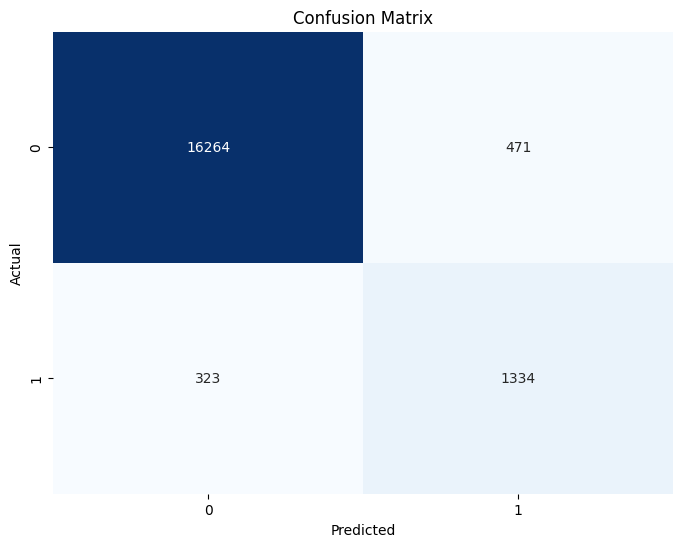

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16735
           1       0.74      0.81      0.77      1657

    accuracy                           0.96     18392
   macro avg       0.86      0.89      0.87     18392
weighted avg       0.96      0.96      0.96     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression

# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms: "bmi_cat_x_age",
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
XG_model = XGBClassifier(**XGB_hyperparameters)

# Fit the model
XG_model.fit(X_train_processed, y_train)


prob_class_1_XG = XG_model.predict_proba(X_test_processed)[:, 1]  # This is where you calculate prob_class_1

# Make predictions
y_pred = XG_model.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, XGB_thresholds = precision_recall_curve(y_test, prob_class_1_XG)

In [ ]:
# Target recall
target_recall = 0.80

# Find the index where recall is closest to the target recall
closest_index = np.argmin(np.abs(recall - target_recall))
closest_recall = recall[closest_index]

print('Index:', closest_index, '|', 'Recall:', closest_recall)

Index: 13698 | Recall: 0.8002414001207001


In [ ]:
chosen_precision = precision[13698]
chosen_threshold = XGB_thresholds[13698]

print('Precision:', chosen_precision,"|", 'Threshold:', chosen_threshold)

Precision: 0.7428571428571429 | Threshold: 0.50438446


In [ ]:
# Same as above but with thresholds  --> result_P056_R_089_TH036

# specific threshold value
target_threshold = 0.36 # Replace with your chosen threshold

# Find the index where the threshold value is closest to the target threshold
closest_threshold_index = np.argmin(np.abs(XGB_thresholds - target_threshold))
closest_threshold = XGB_thresholds[closest_threshold_index]
closest_precision = precision[closest_threshold_index]
closest_recall = recall[closest_threshold_index]

print(f"Closest Threshold: {closest_threshold}")
print(f"Precision at this threshold: {closest_precision}")
print(f"Recall at this threshold: {closest_recall}")


Closest Threshold: 0.36011165380477905
Precision at this threshold: 0.5576631259484067
Recall at this threshold: 0.8871454435727217


# result_P1_R_02_TH099

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression

# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms: "bmi_cat_x_age",
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
XG_model = XGBClassifier(**XGB_hyperparameters)

# Fit the model
XG_model.fit(X_train_processed, y_train)

# Make predictions
y_pred = XG_model.predict(X_test_processed)

# Predictions with custom threshold
prob_class_1 = XG_model.predict_proba(X_test_processed)[:, 1]
threshold =  0.9982729  # Change this threshold as needed
binary_predictions = (prob_class_1 >= threshold).astype(int)

# Identify TP, TN, FP, FN using the threshold
true_positives = (binary_predictions == 1) & (y_test == 1)
true_negatives = (binary_predictions == 0) & (y_test == 0)
false_positives = (binary_predictions == 1) & (y_test == 0)
false_negatives = (binary_predictions == 0) & (y_test == 1)

# Extracting indices
tp_indices = X_test[true_positives].index
tn_indices = X_test[true_negatives].index
fp_indices = X_test[false_positives].index
fn_indices = X_test[false_negatives].index

# Extract characteristics from X_test (original dataset)
tp_characteristics = X_test.loc[tp_indices].assign(Category='TP')
tn_characteristics = X_test.loc[tn_indices].assign(Category='TN')
fp_characteristics = X_test.loc[fp_indices].assign(Category='FP')
fn_characteristics = X_test.loc[fn_indices].assign(Category='FN')

# Create a new DataFrame with TP, TN, FP, FN
result_P1_R_02_TH099 = pd.concat([tp_characteristics, tn_characteristics, fp_characteristics, fn_characteristics])

# Optionally, reset the index if you want a sequential index
#result_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(result_P1_R_02_TH099)

       age  hypertension  heart_disease    bmi  HbA1c_level  \
1005    38             0              0  34.42          8.2   
23463   41             0              0  36.01          7.0   
98399   73             0              0  27.32          8.8   
67845   51             0              1  36.96          6.8   
1937    74             0              1  28.73          7.0   
...    ...           ...            ...    ...          ...   
23092   57             0              0  32.55          6.0   
22857   66             0              0  26.95          5.7   
93144   59             0              0  35.28          6.2   
59160   66             0              1  31.41          6.2   
73867   80             1              1  24.89          6.0   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
1005                   280           0                      0   
23463                  300           0                      0   
98399                  300           1          

# result_P074_R_081_TH050

In [ ]:
# Threshold 0.50438446

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression

# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms: "bmi_cat_x_age",
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
XG_model = XGBClassifier(**XGB_hyperparameters)

# Fit the model
XG_model.fit(X_train_processed, y_train)

# Make predictions
y_pred = XG_model.predict(X_test_processed)

# Predictions with custom threshold
prob_class_1 = XG_model.predict_proba(X_test_processed)[:, 1]
threshold = 0.50438446  # Change this threshold as needed
binary_predictions = (prob_class_1 >= threshold).astype(int)

# Identify TP, TN, FP, FN using the threshold
true_positives = (binary_predictions == 1) & (y_test == 1)
true_negatives = (binary_predictions == 0) & (y_test == 0)
false_positives = (binary_predictions == 1) & (y_test == 0)
false_negatives = (binary_predictions == 0) & (y_test == 1)

# Extracting indices
tp_indices = X_test[true_positives].index
tn_indices = X_test[true_negatives].index
fp_indices = X_test[false_positives].index
fn_indices = X_test[false_negatives].index

# Extract characteristics from X_test (original dataset)
tp_characteristics = X_test.loc[tp_indices].assign(Category='TP')
tn_characteristics = X_test.loc[tn_indices].assign(Category='TN')
fp_characteristics = X_test.loc[fp_indices].assign(Category='FP')
fn_characteristics = X_test.loc[fn_indices].assign(Category='FN')

# Create a new DataFrame with TP, TN, FP, FN
result_P074_R_081_TH050 = pd.concat([tp_characteristics, tn_characteristics, fp_characteristics, fn_characteristics])

# Optionally, reset the index if you want a sequential index
#result_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(result_P074_R_081_TH050)

       age  hypertension  heart_disease    bmi  HbA1c_level  \
47827   43             0              0  40.11          7.0   
93029   69             1              0  26.39          6.1   
13735   69             1              1  27.32          6.5   
86535   31             0              0  27.32          6.8   
1005    38             0              0  34.42          8.2   
...    ...           ...            ...    ...          ...   
59193   56             0              0  33.78          6.1   
14033   36             0              0  23.85          6.1   
22737   49             0              0  28.42          6.1   
76231   53             1              0  27.32          6.2   
22857   66             0              0  26.95          5.7   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
47827                  130           1                      2   
93029                  260           1                      3   
13735                  280           0          

# result_P069_R_082_TH045

In [ ]:
# Closest Threshold: 0.45999467372894287
# Precision at this threshold: 0.6909090909090909
# Recall at this threshold: 0.8255884127942064


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression

# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms: "bmi_cat_x_age",
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
XG_model = XGBClassifier(**XGB_hyperparameters)

# Fit the model
XG_model.fit(X_train_processed, y_train)

# Make predictions
y_pred = XG_model.predict(X_test_processed)

# Predictions with custom threshold
prob_class_1 = XG_model.predict_proba(X_test_processed)[:, 1]
threshold = 0.45  # Change this threshold as needed
binary_predictions = (prob_class_1 >= threshold).astype(int)

# Identify TP, TN, FP, FN using the threshold
true_positives = (binary_predictions == 1) & (y_test == 1)
true_negatives = (binary_predictions == 0) & (y_test == 0)
false_positives = (binary_predictions == 1) & (y_test == 0)
false_negatives = (binary_predictions == 0) & (y_test == 1)

# Extracting indices
tp_indices = X_test[true_positives].index
tn_indices = X_test[true_negatives].index
fp_indices = X_test[false_positives].index
fn_indices = X_test[false_negatives].index

# Extract characteristics from X_test (original dataset)
tp_characteristics = X_test.loc[tp_indices].assign(Category='TP')
tn_characteristics = X_test.loc[tn_indices].assign(Category='TN')
fp_characteristics = X_test.loc[fp_indices].assign(Category='FP')
fn_characteristics = X_test.loc[fn_indices].assign(Category='FN')

# Create a new DataFrame with TP, TN, FP, FN
result_P069_R_082_TH045 = pd.concat([tp_characteristics, tn_characteristics, fp_characteristics, fn_characteristics])

# Optionally, reset the index if you want a sequential index
#result_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(result_P069_R_082_TH045)


       age  hypertension  heart_disease    bmi  HbA1c_level  \
47827   43             0              0  40.11          7.0   
93029   69             1              0  26.39          6.1   
13735   69             1              1  27.32          6.5   
86535   31             0              0  27.32          6.8   
1005    38             0              0  34.42          8.2   
...    ...           ...            ...    ...          ...   
27679   80             0              0  18.54          6.1   
14033   36             0              0  23.85          6.1   
22737   49             0              0  28.42          6.1   
76231   53             1              0  27.32          6.2   
22857   66             0              0  26.95          5.7   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
47827                  130           1                      2   
93029                  260           1                      3   
13735                  280           0          

# result_P056_R_089_TH036

In [ ]:
# Closest Threshold: 0.45999467372894287
# Precision at this threshold: 0.6909090909090909
# Recall at this threshold: 0.8255884127942064


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression

# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms: "bmi_cat_x_age",
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
XG_model = XGBClassifier(**XGB_hyperparameters)

# Fit the model
XG_model.fit(X_train_processed, y_train)

# Make predictions
y_pred = XG_model.predict(X_test_processed)

# Predictions with custom threshold
prob_class_1 = XG_model.predict_proba(X_test_processed)[:, 1]
threshold = 0.36  # Change this threshold as needed
binary_predictions = (prob_class_1 >= threshold).astype(int)

# Identify TP, TN, FP, FN using the threshold
true_positives = (binary_predictions == 1) & (y_test == 1)
true_negatives = (binary_predictions == 0) & (y_test == 0)
false_positives = (binary_predictions == 1) & (y_test == 0)
false_negatives = (binary_predictions == 0) & (y_test == 1)

# Extracting indices
tp_indices = X_test[true_positives].index
tn_indices = X_test[true_negatives].index
fp_indices = X_test[false_positives].index
fn_indices = X_test[false_negatives].index

# Extract characteristics from X_test (original dataset)
tp_characteristics = X_test.loc[tp_indices].assign(Category='TP')
tn_characteristics = X_test.loc[tn_indices].assign(Category='TN')
fp_characteristics = X_test.loc[fp_indices].assign(Category='FP')
fn_characteristics = X_test.loc[fn_indices].assign(Category='FN')

# Create a new DataFrame with TP, TN, FP, FN
result_P056_R_089_TH036 = pd.concat([tp_characteristics, tn_characteristics, fp_characteristics, fn_characteristics])

# Optionally, reset the index if you want a sequential index
#result_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(result_P056_R_089_TH036)

# Closest Threshold: 0.36011165380477905
# Precision at this threshold: 0.5576631259484067
# Recall at this threshold: 0.8871454435727217

       age  hypertension  heart_disease    bmi  HbA1c_level  \
47827   43             0              0  40.11          7.0   
93029   69             1              0  26.39          6.1   
13735   69             1              1  27.32          6.5   
86535   31             0              0  27.32          6.8   
1005    38             0              0  34.42          8.2   
...    ...           ...            ...    ...          ...   
52532   60             0              0  29.19          6.1   
27679   80             0              0  18.54          6.1   
14033   36             0              0  23.85          6.1   
22737   49             0              0  28.42          6.1   
76231   53             1              0  27.32          6.2   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
47827                  130           1                      2   
93029                  260           1                      3   
13735                  280           0          

In [ ]:
print(result_P1_R_02_TH099[result_P1_R_02_TH099['Category'] == 'FP'])

Empty DataFrame
Columns: [age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender_cat, smoking_history_cat_2, blood_glucose_level_cat, blood_glucose_level_cat_1, age_cat, HbA1c_level_cat, HbA1c_level_cat_2, bmi_cat, blood_glucose_level_cat_x_HbA1c_level_cat, HbA1c_level_cat_x_age, bmi^2_x_age^2, bmi_x_age, Category]
Index: []


In [ ]:
result_P069_R_082_TH045
result_P074_R_081_TH050
result_P1_R_02_TH099

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_cat,smoking_history_cat_2,blood_glucose_level_cat,blood_glucose_level_cat_1,age_cat,HbA1c_level_cat,HbA1c_level_cat_2,bmi_cat,blood_glucose_level_cat_x_HbA1c_level_cat,HbA1c_level_cat_x_age,bmi^2_x_age^2,bmi_x_age,Category
1005,38,0,0,34.42,8.2,280,0,0,3,3,2,3,3,4,9,114,1.710759e+06,1307.96,TP
23463,41,0,0,36.01,7.0,300,0,0,3,3,2,3,3,4,9,123,2.179786e+06,1476.41,TP
98399,73,0,0,27.32,8.8,300,1,1,3,3,4,3,3,3,9,219,3.977472e+06,1994.36,TP
67845,51,0,1,36.96,6.8,260,0,3,3,3,3,3,3,4,9,153,3.553074e+06,1884.96,TP
1937,74,0,1,28.73,7.0,220,1,3,3,3,4,3,3,3,9,222,4.519961e+06,2126.02,TP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,57,0,0,32.55,6.0,260,1,3,3,3,3,2,2,4,6,114,3.442324e+06,1855.35,FN
22857,66,0,0,26.95,5.7,130,1,3,3,2,4,2,2,3,6,132,3.163774e+06,1778.70,FN
93144,59,0,0,35.28,6.2,140,1,3,3,2,3,2,2,4,6,118,4.332726e+06,2081.52,FN
59160,66,0,1,31.41,6.2,260,1,0,3,3,4,2,2,4,6,132,4.297578e+06,2073.06,FN


In [ ]:
import pandas as pd

# Assuming fn_characteristics_ has the same index as the original diabetesDf dataset
# and 'diabetes' is the column in diabetesDf that you want to merge

# Merge the 'diabetes' column back into fn_characteristics_
result_P1_R_02_TH099 = result_P1_R_02_TH099.merge(diabetesDf[['diabetes']], left_index=True, right_index=True)
result_P069_R_082_TH045 = result_P069_R_082_TH045.merge(diabetesDf[['diabetes']], left_index=True, right_index=True)
result_P074_R_081_TH050 = result_P074_R_081_TH050.merge(diabetesDf[['diabetes']], left_index=True, right_index=True)
result_P056_R_089_TH036 = result_P056_R_089_TH036.merge(diabetesDf[['diabetes']], left_index=True, right_index=True)

# Now fn_characteristics_with_target includes the target variable 'diabetes'
print(result_P1_R_02_TH099)

       age  hypertension  heart_disease    bmi  HbA1c_level  \
1005    38             0              0  34.42          8.2   
23463   41             0              0  36.01          7.0   
98399   73             0              0  27.32          8.8   
67845   51             0              1  36.96          6.8   
1937    74             0              1  28.73          7.0   
...    ...           ...            ...    ...          ...   
23092   57             0              0  32.55          6.0   
22857   66             0              0  26.95          5.7   
93144   59             0              0  35.28          6.2   
59160   66             0              1  31.41          6.2   
73867   80             1              1  24.89          6.0   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
1005                   280           0                      0   
23463                  300           0                      0   
98399                  300           1          

In [ ]:
result_P074_R_081_TH050.loc[22857]


age                                                  66
hypertension                                          0
heart_disease                                         0
bmi                                               26.95
HbA1c_level                                         5.7
blood_glucose_level                                 130
gender_cat                                            1
smoking_history_cat_2                                 3
blood_glucose_level_cat                               3
blood_glucose_level_cat_1                             2
age_cat                                               4
HbA1c_level_cat                                       2
HbA1c_level_cat_2                                     2
bmi_cat                                               3
blood_glucose_level_cat_x_HbA1c_level_cat             6
HbA1c_level_cat_x_age                               132
bmi^2_x_age^2                                3163773.69
bmi_x_age                                       

In [ ]:
print()

# result_P074_R_081_TH050.loc[22857]


result_P056_R_089_TH036.loc[22857]

age                                                  66
hypertension                                          0
heart_disease                                         0
bmi                                               26.95
HbA1c_level                                         5.7
blood_glucose_level                                 130
gender_cat                                            1
smoking_history_cat_2                                 3
blood_glucose_level_cat                               3
blood_glucose_level_cat_1                             2
age_cat                                               4
HbA1c_level_cat                                       2
HbA1c_level_cat_2                                     2
bmi_cat                                               3
blood_glucose_level_cat_x_HbA1c_level_cat             6
HbA1c_level_cat_x_age                               132
bmi^2_x_age^2                                3163773.69
bmi_x_age                                       

In [ ]:
print(result_P1_R_02_TH099[(result_P1_R_02_TH099["HbA1c_level"] == 5.7) & (result_P1_R_02_TH099["blood_glucose_level"] == 130) & (result_P1_R_02_TH099["Category"] == 'FN')])

       age  hypertension  heart_disease    bmi  HbA1c_level  \
17416   68             0              0  26.07          5.7   
89950   71             0              0  29.20          5.7   
35060   48             0              0  26.76          5.7   
7106    61             1              0  36.61          5.7   
22188   66             1              1  31.87          5.7   
81894   63             0              0  31.22          5.7   
41061   60             0              0  39.93          5.7   
94077   79             0              0  29.69          5.7   
88169   70             0              0  24.68          5.7   
22857   66             0              0  26.95          5.7   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
17416                  130           1                      1   
89950                  130           0                      1   
35060                  130           1                      0   
7106                   130           1        

In [ ]:
print(result_P1_R_02_TH099[(result_P1_R_02_TH099["HbA1c_level"] == 9.0) & (result_P1_R_02_TH099["blood_glucose_level"] == 200) & (result_P1_R_02_TH099["Category"] == 'FN')])

       age  hypertension  heart_disease    bmi  HbA1c_level  \
41762   36             0              0  43.18          9.0   
34975   38             0              0  35.35          9.0   
1615    30             0              0  27.32          9.0   
29714   59             0              0  27.32          9.0   
10061   29             0              0  21.94          9.0   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
41762                  200           0                      0   
34975                  200           1                      3   
1615                   200           1                      2   
29714                  200           1                      0   
10061                  200           1                      0   

       blood_glucose_level_cat  blood_glucose_level_cat_1  age_cat  \
41762                        3                          2        2   
34975                        3                          2        2   
1615                

In [ ]:
print(result_P056_R_089_TH036[(result_P056_R_089_TH036["HbA1c_level"] == 9.0) & (result_P056_R_089_TH036["blood_glucose_level"] == 200) & (result_P056_R_089_TH036["Category"] == 'FN')])

Empty DataFrame
Columns: [age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender_cat, smoking_history_cat_2, blood_glucose_level_cat, blood_glucose_level_cat_1, age_cat, HbA1c_level_cat, HbA1c_level_cat_2, bmi_cat, blood_glucose_level_cat_x_HbA1c_level_cat, HbA1c_level_cat_x_age, bmi^2_x_age^2, bmi_x_age, Category, diabetes]
Index: []


In [ ]:
# result_P056_R_089_TH036  --> 94077
print(result_P056_R_089_TH036[(result_P056_R_089_TH036["HbA1c_level"] == 5.7) & (result_P056_R_089_TH036["blood_glucose_level"] == 130) & (result_P056_R_089_TH036["Category"] == 'TP')])

       age  hypertension  heart_disease    bmi  HbA1c_level  \
7106    61             1              0  36.61          5.7   
22188   66             1              1  31.87          5.7   
81894   63             0              0  31.22          5.7   
41061   60             0              0  39.93          5.7   
94077   79             0              0  29.69          5.7   
22857   66             0              0  26.95          5.7   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
7106                   130           1                      1   
22188                  130           0                      3   
81894                  130           0                      1   
41061                  130           0                      1   
94077                  130           0                      0   
22857                  130           1                      3   

       blood_glucose_level_cat  blood_glucose_level_cat_1  age_cat  \
7106                         3  

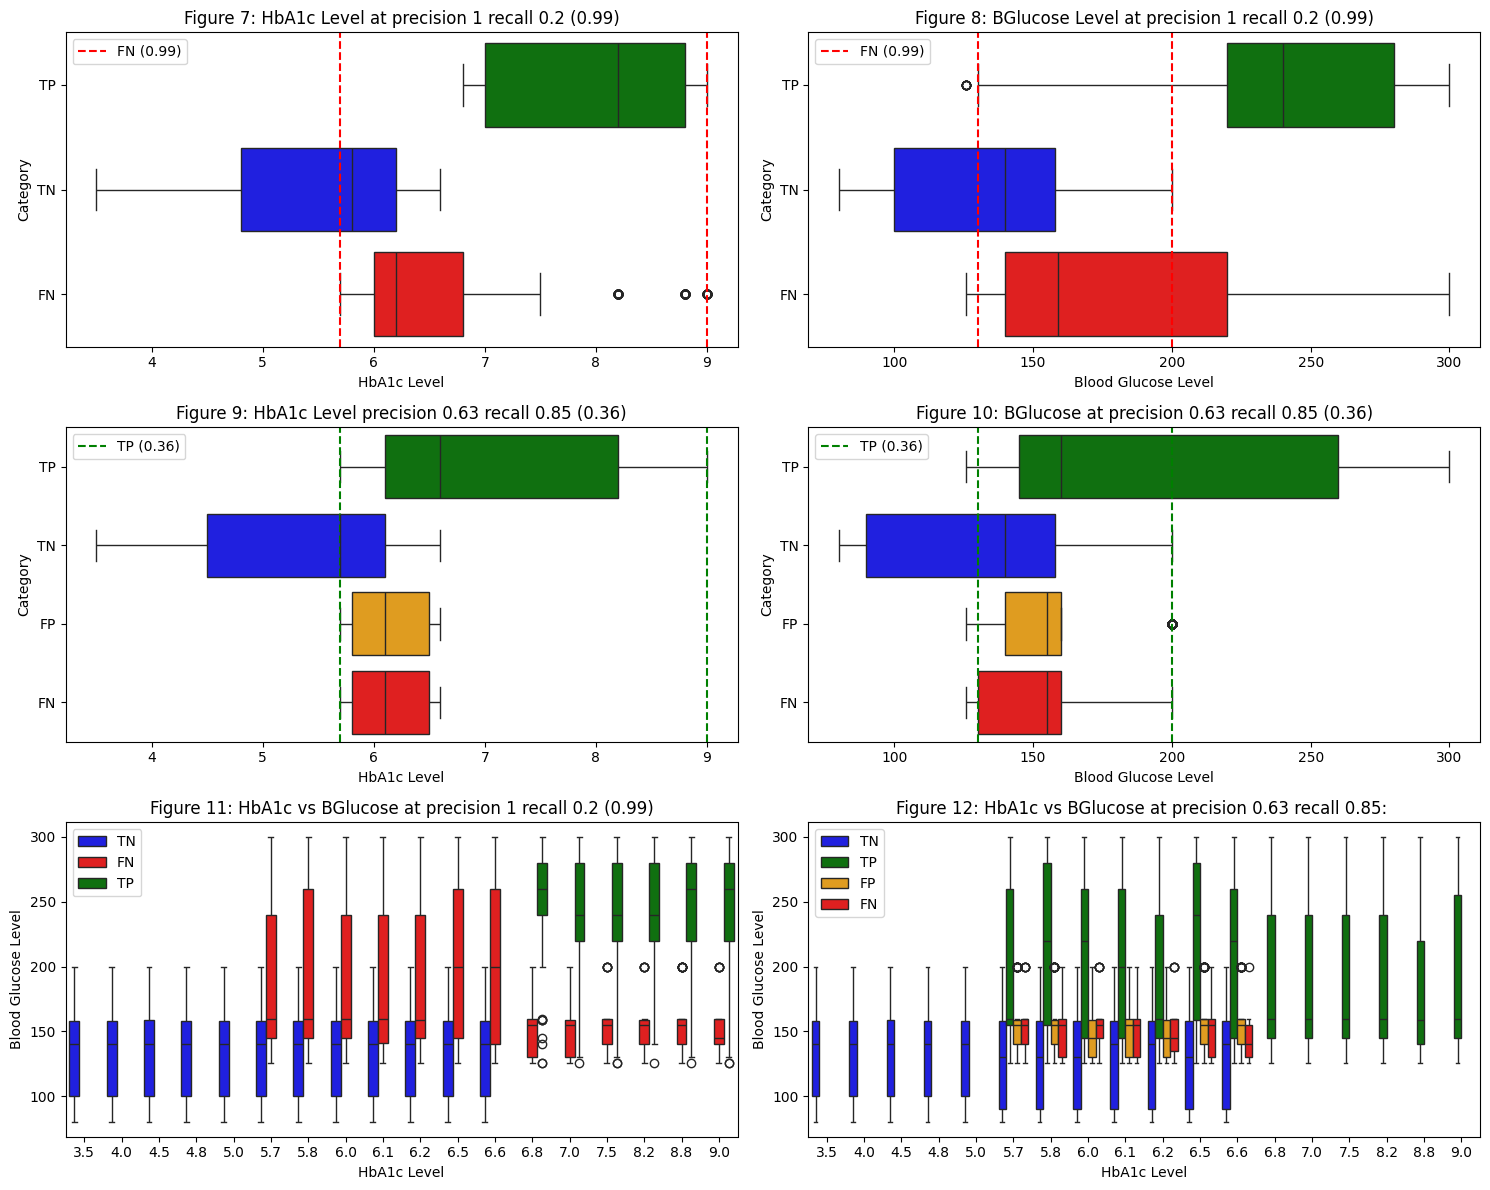

In [ ]:
# Create a 3x2 subplot (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

palette = {"TP": "green", "TN": "blue", "FN": "red", "FP": "orange"}

# Boxplot for result_P1_R_02_TH099 HbA1c_level
sns.boxplot(data=result_P1_R_02_TH099, x = "HbA1c_level", y = "Category", palette=palette ,ax=axes[0, 0])
axes[0, 0].set_title("Figure 7: HbA1c Level at precision 1 recall 0.2 (0.99)")
axes[0, 0].set_xlabel("HbA1c Level")
axes[0, 0].set_ylabel("Category")
axes[0, 0].axvline(x=9, color='red', linestyle='--', label= 'FN (0.99)')
axes[0, 0].axvline(x=5.7, color='red', linestyle='--')

# Boxplot for result_P1_R_02_TH099 blood_glucose_level
sns.boxplot(data=result_P1_R_02_TH099, x="blood_glucose_level", y="Category", palette = palette ,ax=axes[0, 1])
axes[0, 1].set_title("Figure 8: BGlucose Level at precision 1 recall 0.2 (0.99)")
axes[0, 1].set_xlabel("Blood Glucose Level")
axes[0, 1].set_ylabel("Category")
axes[0, 1].axvline(x=200, color='red', linestyle='--', label= 'FN (0.99)')
axes[0, 1].axvline(x=130, color='red', linestyle='--')

# Boxplot for result_P056_R_089_TH036 HbA1c_level
sns.boxplot(data=result_P056_R_089_TH036, x="HbA1c_level", y="Category", palette = palette ,ax=axes[1, 0])
axes[1, 0].set_title("Figure 9: HbA1c Level precision 0.63 recall 0.85 (0.36)")
axes[1, 0].set_xlabel("HbA1c Level")
axes[1, 0].set_ylabel("Category")
axes[1, 0].axvline(x=9, color='green', linestyle='--', label= 'TP (0.36)')
axes[1, 0].axvline(x=5.7, color='green', linestyle='--')

# Boxplot for result_P056_R_089_TH036 blood_glucose_level
sns.boxplot(data=result_P056_R_089_TH036, x="blood_glucose_level", y="Category", palette = palette ,ax=axes[1, 1])
axes[1, 1].set_title("Figure 10: BGlucose at precision 0.63 recall 0.85 (0.36)")
axes[1, 1].set_xlabel("Blood Glucose Level")
axes[1, 1].set_ylabel("Category")
axes[1, 1].axvline(x=200, color='green', linestyle='--', label= 'TP (0.36)')
axes[1, 1].axvline(x=130, color='green', linestyle='--', )



# Scatter plot for result_P1_R_02_TH099 HbA1c_level vs blood_glucose_level
sns.boxplot(data=result_P1_R_02_TH099, x="HbA1c_level", y="blood_glucose_level", palette = palette ,hue="Category", ax=axes[2, 0])
axes[2, 0].set_title("Figure 11: HbA1c vs BGlucose at precision 1 recall 0.2 (0.99)")
axes[2, 0].set_xlabel("HbA1c Level")
axes[2, 0].set_ylabel("Blood Glucose Level")

# Scatter plot for result_P056_R_089_TH036 HbA1c_level vs blood_glucose_level
sns.boxplot(data=result_P056_R_089_TH036, x="HbA1c_level", y="blood_glucose_level", palette = palette  ,hue = "Category", ax = axes[2, 1])
axes[2, 1].set_title("Figure 12: HbA1c vs BGlucose at precision 0.63 recall 0.85: ")
axes[2, 1].set_xlabel("HbA1c Level")
axes[2, 1].set_ylabel("Blood Glucose Level")

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()
axes[2, 0].legend()
axes[2, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
# HbA1c_level                                           5.7
# blood_glucose_level                                   130

# HbA1c_level                                           9.0
# blood_glucose_level                                   200


# Threshold setting

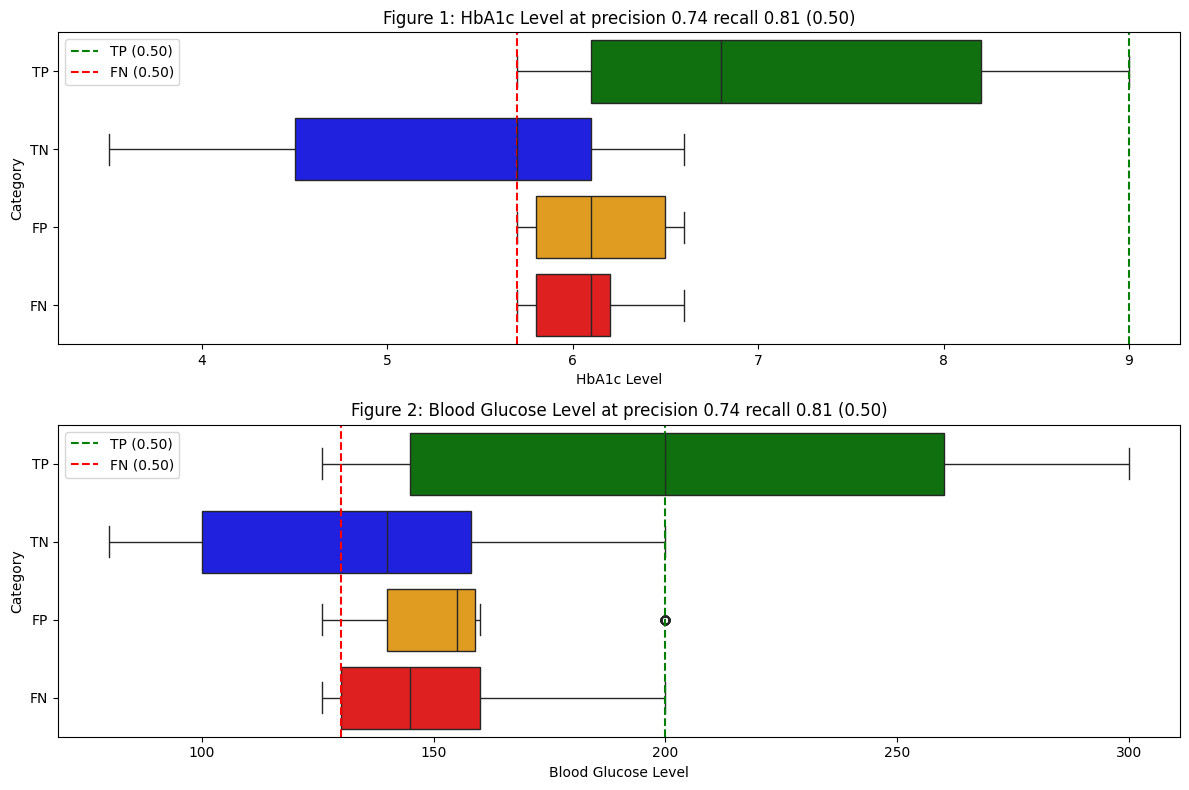

In [ ]:

# Create a 2x1 subplot (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # figsize=(15, 12)
palette = {"TP": "green", "TN": "blue", "FN": "red", "FP": "orange"}

# Boxplot for result_P074_R_081_TH050 HbA1c_level
sns.boxplot(data=result_P074_R_081_TH050, x="HbA1c_level", y="Category", palette=palette, ax=axes[0])
axes[0].set_title("Figure 1: HbA1c Level at precision 0.74 recall 0.81 (0.50)")
axes[0].set_xlabel("HbA1c Level")
axes[0].set_ylabel("Category")
axes[0].axvline(x=9, color='green', linestyle='--', label='TP (0.50)')
axes[0].axvline(x=5.7, color='red', linestyle='--', label='FN (0.50)')

# Boxplot for result_P074_R_081_TH050 blood_glucose_level
sns.boxplot(data=result_P074_R_081_TH050, x="blood_glucose_level", y="Category", palette=palette, ax=axes[1])
axes[1].set_title("Figure 2: Blood Glucose Level at precision 0.74 recall 0.81 (0.50)")
axes[1].set_xlabel("Blood Glucose Level")
axes[1].set_ylabel("Category")
axes[1].axvline(x=200, color='green', linestyle='--', label='TP (0.50)')
axes[1].axvline(x=130, color='red', linestyle='--', label='FN (0.50)')

axes[0].legend()
axes[1].legend()
# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
print(result_P074_R_081_TH050[(result_P074_R_081_TH050["HbA1c_level"] == 9.0) & (result_P074_R_081_TH050["blood_glucose_level"] == 200) & (result_P074_R_081_TH050["Category"] == 'FN')])

Empty DataFrame
Columns: [age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender_cat, smoking_history_cat_2, blood_glucose_level_cat, blood_glucose_level_cat_1, age_cat, HbA1c_level_cat, HbA1c_level_cat_2, bmi_cat, blood_glucose_level_cat_x_HbA1c_level_cat, HbA1c_level_cat_x_age, bmi^2_x_age^2, bmi_x_age, Category, diabetes]
Index: []


In [ ]:
print(result_P074_R_081_TH050[(result_P074_R_081_TH050["HbA1c_level"] == 5.7) & (result_P074_R_081_TH050["blood_glucose_level"] == 130) & (result_P074_R_081_TH050["Category"] == 'FN')])

       age  hypertension  heart_disease    bmi  HbA1c_level  \
17416   68             0              0  26.07          5.7   
89950   71             0              0  29.20          5.7   
35060   48             0              0  26.76          5.7   
81894   63             0              0  31.22          5.7   
94077   79             0              0  29.69          5.7   
88169   70             0              0  24.68          5.7   
22857   66             0              0  26.95          5.7   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
17416                  130           1                      1   
89950                  130           0                      1   
35060                  130           1                      0   
81894                  130           0                      1   
94077                  130           0                      0   
88169                  130           0                      0   
22857                  130           1  

# Further Analysis

In [ ]:
result_P1_R_02_TH099
result_P056_R_089_TH036

In [ ]:
print(result_P056_R_089_TH036.loc[22857]) # here

age                                                  66
hypertension                                          0
heart_disease                                         0
bmi                                               26.95
HbA1c_level                                         5.7
blood_glucose_level                                 130
gender_cat                                            1
smoking_history_cat_2                                 3
blood_glucose_level_cat                               3
blood_glucose_level_cat_1                             2
age_cat                                               4
HbA1c_level_cat                                       2
HbA1c_level_cat_2                                     2
bmi_cat                                               3
blood_glucose_level_cat_x_HbA1c_level_cat             6
HbA1c_level_cat_x_age                               132
bmi^2_x_age^2                                3163773.69
bmi_x_age                                       

In [ ]:
# Filter for FN in the first dataset
fn_individuals = result_P1_R_02_TH099[result_P1_R_02_TH099['Category'] == 'FN']

# Filter for TP in the second dataset
tp_individuals = result_P056_R_089_TH036[result_P056_R_089_TH036['Category'] == 'TP']

# Merge the datasets on their indices
matched_individuals = pd.merge(fn_individuals, tp_individuals, left_index=True, right_index=True, how='inner')


# If you want to keep the feature from the second dataset
for column in fn_individuals.columns:
    if column != 'Category':  # Assuming 'Category' is the only column you don't want to replace
        matched_individuals[column] = matched_individuals[column + '_y']

# Drop the duplicated columns
matched_individuals.drop([col for col in matched_individuals.columns if '_x' in col or '_y' in col], axis=1, inplace=True)

# Display the cleaned DataFrame
print(matched_individuals)


       age  hypertension  heart_disease    bmi  HbA1c_level  \
47827   43             0              0  40.11          7.0   
93029   69             1              0  26.39          6.1   
13735   69             1              1  27.32          6.5   
86535   31             0              0  27.32          6.8   
40459   68             1              0  29.58          6.5   
...    ...           ...            ...    ...          ...   
23092   57             0              0  32.55          6.0   
22857   66             0              0  26.95          5.7   
93144   59             0              0  35.28          6.2   
59160   66             0              1  31.41          6.2   
73867   80             1              1  24.89          6.0   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
47827                  130           1                      2   
93029                  260           1                      3   
13735                  280           0          

In [ ]:
# Assuming you have:
# XGB_thresholds: the array of predicted probabilities
# y_test: the actual labels
# threshold_value: the threshold for deciding positive/negative class

# Set your threshold (e.g., 0.5)
threshold = 0.5

# Find indices where the probability is less than or equal to 0.36
indices = np.where(XGB_thresholds <= 0.36)[0]

# Determine the predicted labels for these indices based on the threshold
predicted_labels = (XGB_thresholds[indices] > threshold).astype(int)

# Extract the actual labels for these indices
actual_labels = y_test.iloc[indices] if isinstance(y_test, pd.Series) else y_test[indices]

# Compare predicted labels with actual labels to find FN and TN
false_negatives = np.where((predicted_labels == 0) & (actual_labels == 1))[0]
true_negatives = np.where((predicted_labels == 0) & (actual_labels == 0))[0]
true_positives = np.where((predicted_labels == 1) & (actual_labels == 1))[0]
false_positives = np.where((predicted_labels == 1) & (actual_labels == 0))[0]


print('False Negatives:', len(false_negatives))
print('True Negatives:', len(true_negatives))
print('True Positives:', len(true_positives))
print('False Positives:', len(false_positives))


fn_indices = np.where((predicted_labels == 0) & (actual_labels == 1))[0]

# If X_test is a DataFrame, you can use iloc to extract the rows
fn_df = X_test.iloc[fn_indices] if isinstance(X_test, pd.DataFrame) else X_test[fn_indices]

# fn_df now contains the subset of X_test corresponding to False Negatives
print(fn_df)


False Negatives: 1186
True Negatives: 11703
True Positives: 0
False Positives: 0
       age  hypertension  heart_disease    bmi  HbA1c_level  \
47827   43             0              0  40.11          7.0   
93029   69             1              0  26.39          6.1   
13735   69             1              1  27.32          6.5   
86535   31             0              0  27.32          6.8   
1005    38             0              0  34.42          8.2   
...    ...           ...            ...    ...          ...   
67869   65             0              0  28.76          6.0   
55623   67             0              1  29.28          6.8   
77530   54             1              0  34.37          6.5   
49706   64             1              0  24.39          8.2   
48871   57             0              0  30.93          8.8   

       blood_glucose_level  gender_cat  smoking_history_cat_2  \
47827                  130           1                      2   
93029                  260      

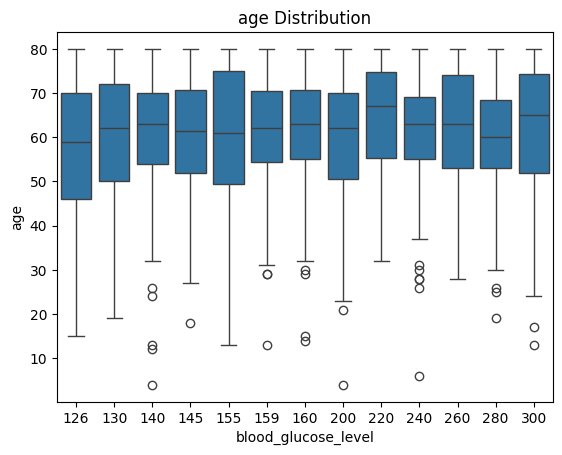

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='blood_glucose_level', y='age', data = fn_df)
plt.title('age Distribution')
plt.ylabel('age')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


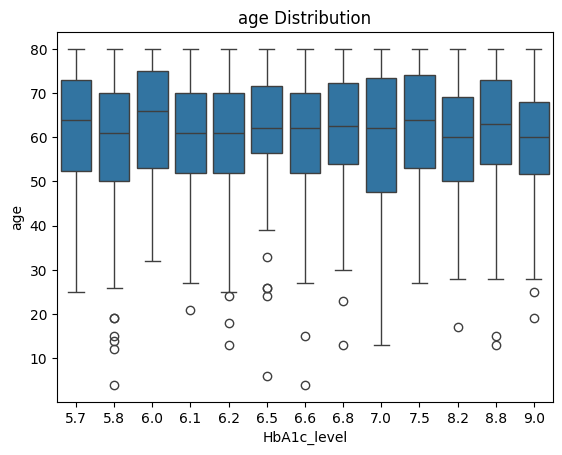

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='HbA1c_level', y='age', data=fn_df)
plt.title('age Distribution')
plt.ylabel('age')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


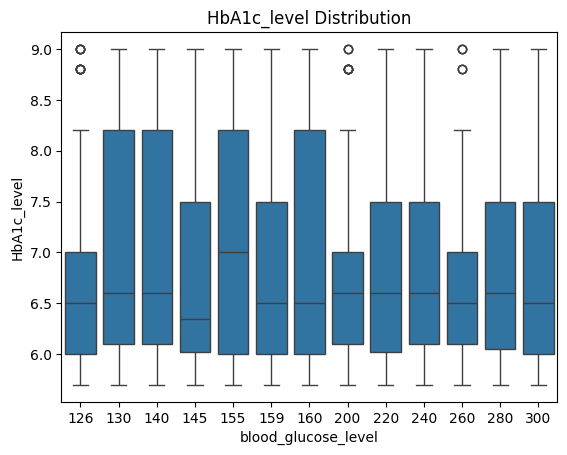

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='blood_glucose_level', y='HbA1c_level', data=fn_df)
plt.title('HbA1c_level Distribution')
plt.ylabel('HbA1c_level')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


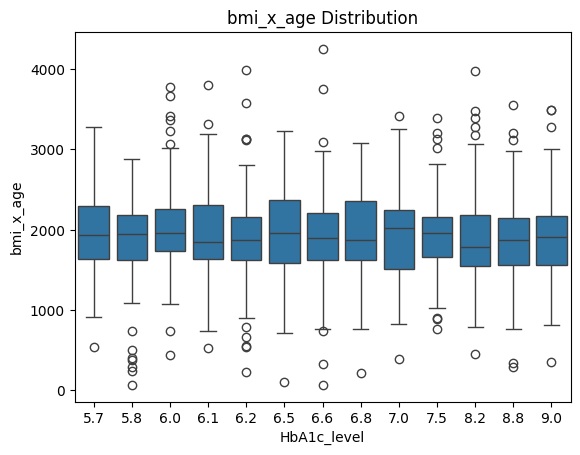

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='HbA1c_level', y='bmi_x_age', data = fn_df)
plt.title('bmi_x_age Distribution')
plt.ylabel('bmi_x_age')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


In [ ]:
out_of_reach_fn_fp = (result_P074_R_081_TH050[(result_P074_R_081_TH050['Category'] == 'FN') | (result_P074_R_081_TH050['Category'] == 'FP')])

In [ ]:
print(out_of_reach_fn_fp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 12200 to 22857
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        790 non-null    int64  
 1   hypertension                               790 non-null    int64  
 2   heart_disease                              790 non-null    int64  
 3   bmi                                        790 non-null    float64
 4   HbA1c_level                                790 non-null    float64
 5   blood_glucose_level                        790 non-null    int64  
 6   gender_cat                                 790 non-null    int64  
 7   smoking_history_cat_2                      790 non-null    int64  
 8   blood_glucose_level_cat                    790 non-null    int64  
 9   blood_glucose_level_cat_1                  790 non-null    int64  
 10  age_cat             

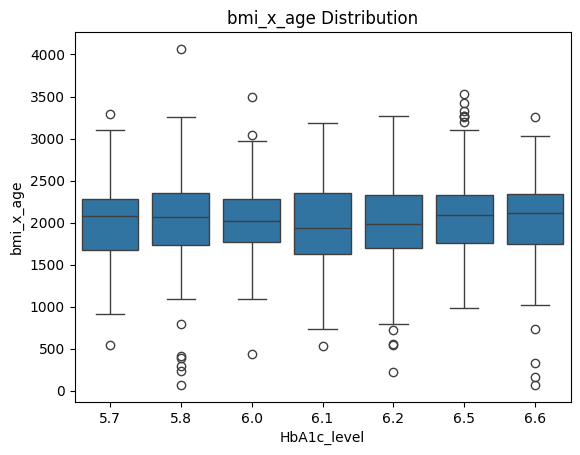

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='HbA1c_level', y='bmi_x_age', data=out_of_reach_fn_fp)
plt.title('bmi_x_age Distribution')
plt.ylabel('bmi_x_age')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


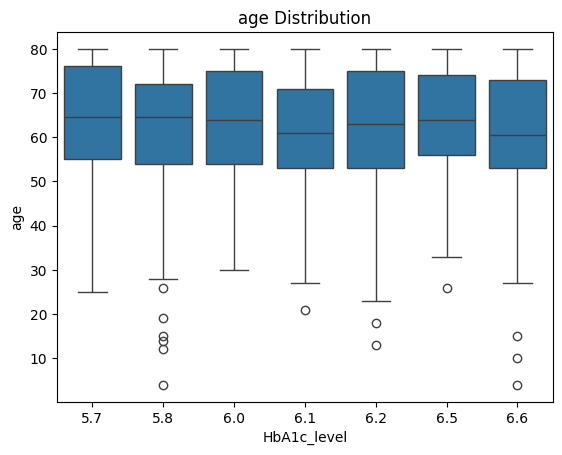

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='HbA1c_level', y='age', data=out_of_reach_fn_fp)
plt.title('age Distribution')
plt.ylabel('age')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


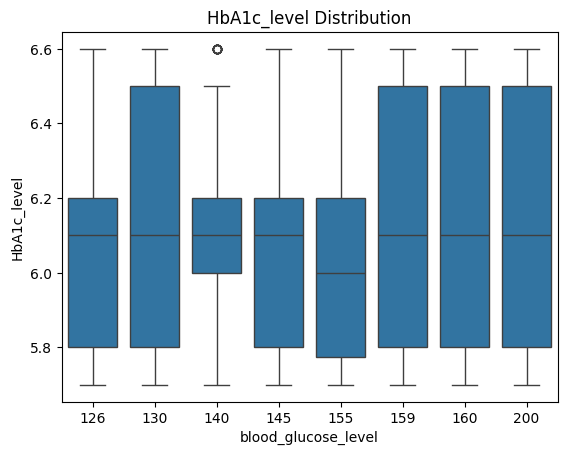

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='blood_glucose_level', y='HbA1c_level', data=out_of_reach_fn_fp)
plt.title('HbA1c_level Distribution')
plt.ylabel('HbA1c_level')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


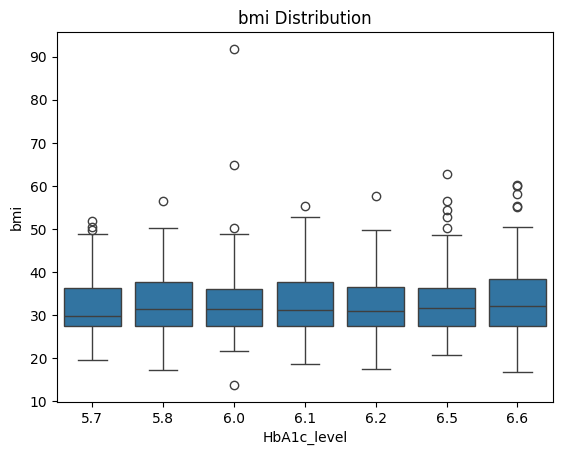

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='HbA1c_level', y='bmi', data=out_of_reach_fn_fp)
plt.title('bmi Distribution')
plt.ylabel('bmi')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


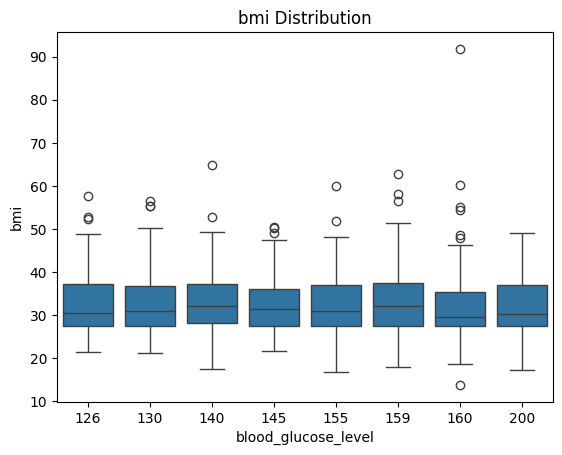

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='blood_glucose_level', y='bmi', data=out_of_reach_fn_fp)
plt.title('bmi Distribution')
plt.ylabel('bmi')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


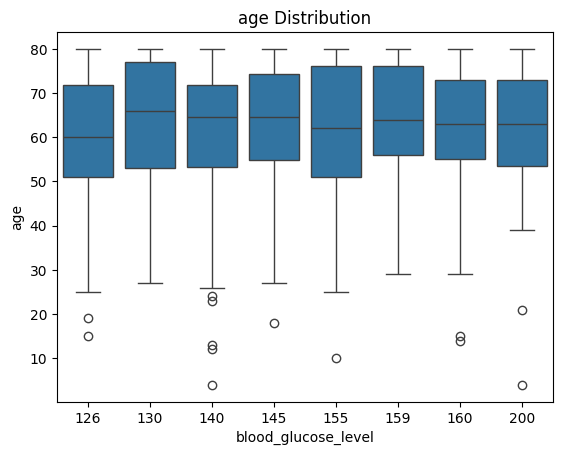

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='blood_glucose_level', y='age', data=out_of_reach_fn_fp)
plt.title('age Distribution')
plt.ylabel('age')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


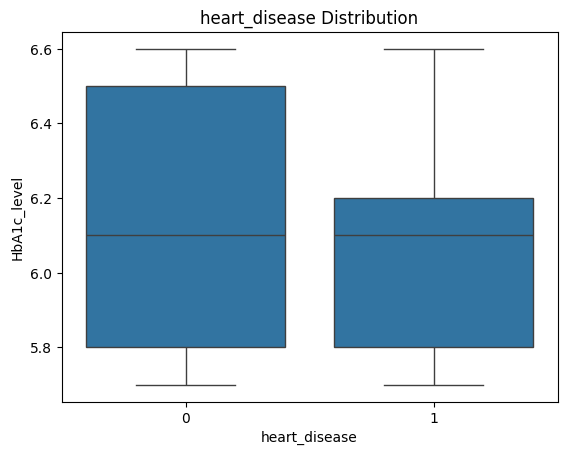

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='heart_disease', y='HbA1c_level', data=out_of_reach_fn_fp)
plt.title('heart_disease Distribution')
plt.ylabel('HbA1c_level')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()


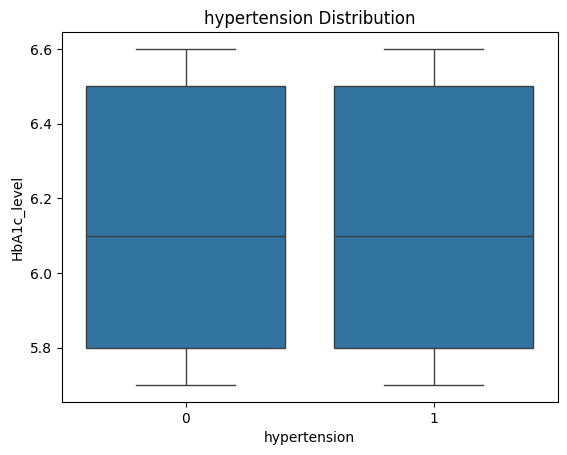

In [ ]:
# Assuming 'diabetes_status' is a column in your DataFrame indicating diabetes categories (e.g., 'No Diabetes', 'Pre-Diabetes', 'Diabetes')
# Replace with your actual column name
sns.boxplot(x='hypertension', y='HbA1c_level', data = out_of_reach_fn_fp)
plt.title('hypertension Distribution')
plt.ylabel('HbA1c_level')
#plt.legend(title='Diabetes Status', loc='upper right')  # Add legend
plt.show()
